# Portfolio Link

In [1]:
%%html
<a href="http://hkbtotw.thddns.net:8880">Investment Portfolio Monitoring</a>

# Technical Analysis

In [2]:
from TechnicalCalculation import *
# Import initial libraries
from Operations_3 import *
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

warnings.filterwarnings("ignore")

### Read data from Google Sheet
readSheet=ReadSheet()
sheetFList=readSheet.Authorization_Fund()

dfList=[]
for n in sheetFList:
    dfIn=readSheet.LoadSheet(n)
    dfList.append(dfIn)

    
fundDict=dict(zip(fundList,dfList))

del sheetFList

C:\Users\70018928\AppData\Local\Continuum\anaconda3\envs\quandl\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


-------------  TMBCOF  //////////////////////


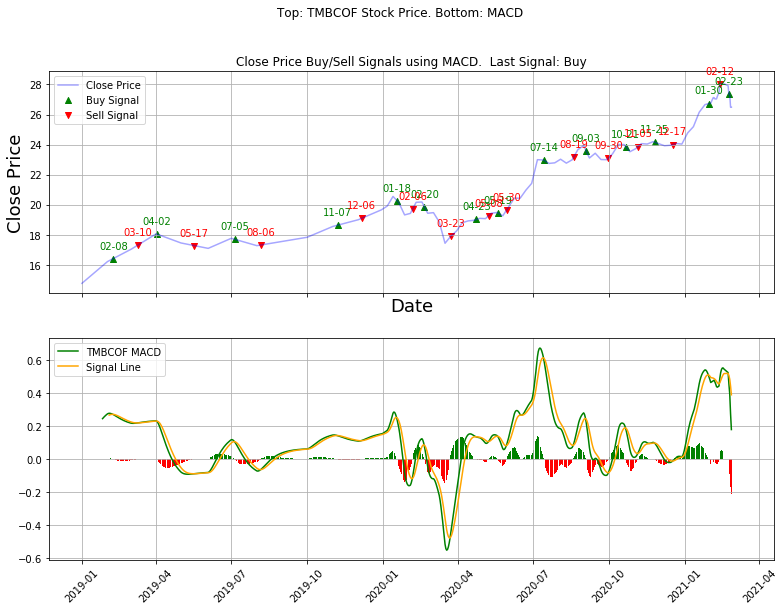

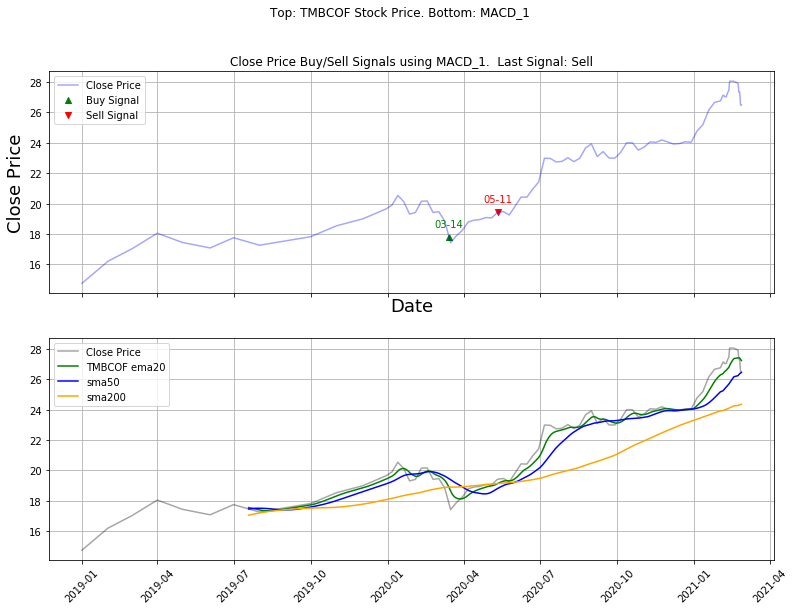

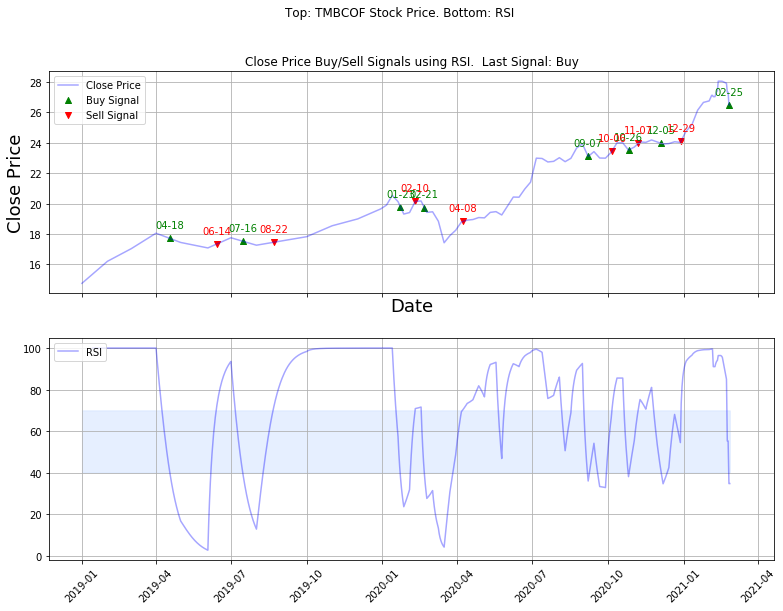

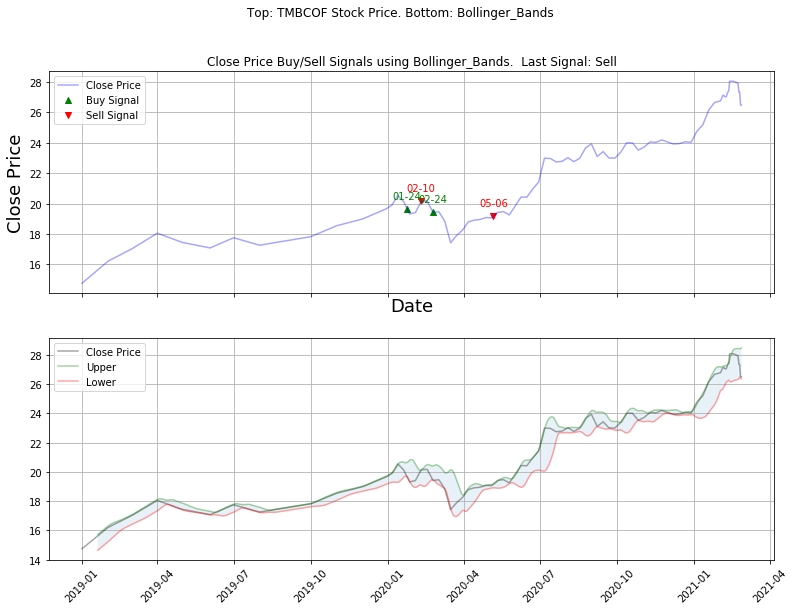

-------------  ONE-UGG-RA  //////////////////////


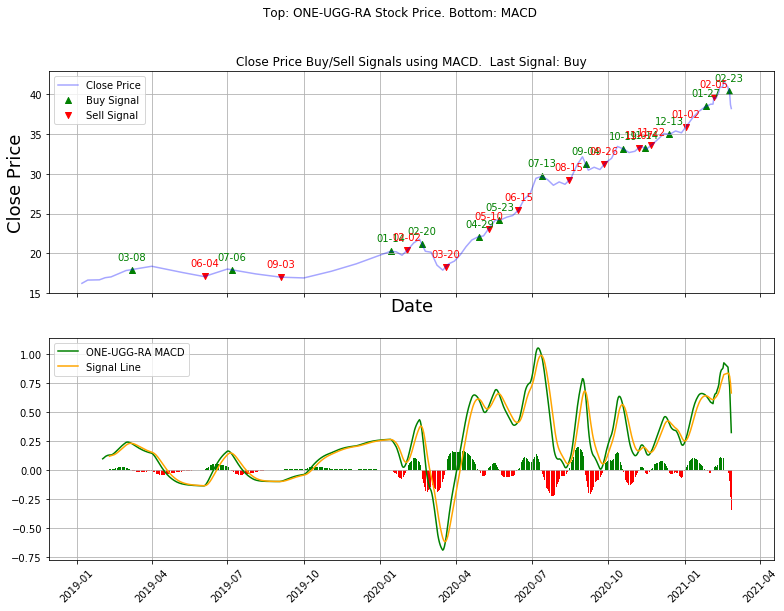

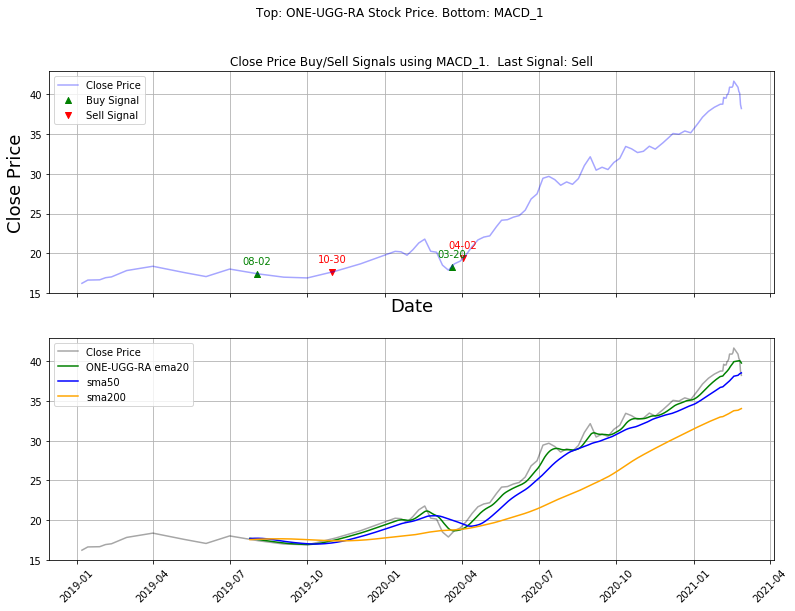

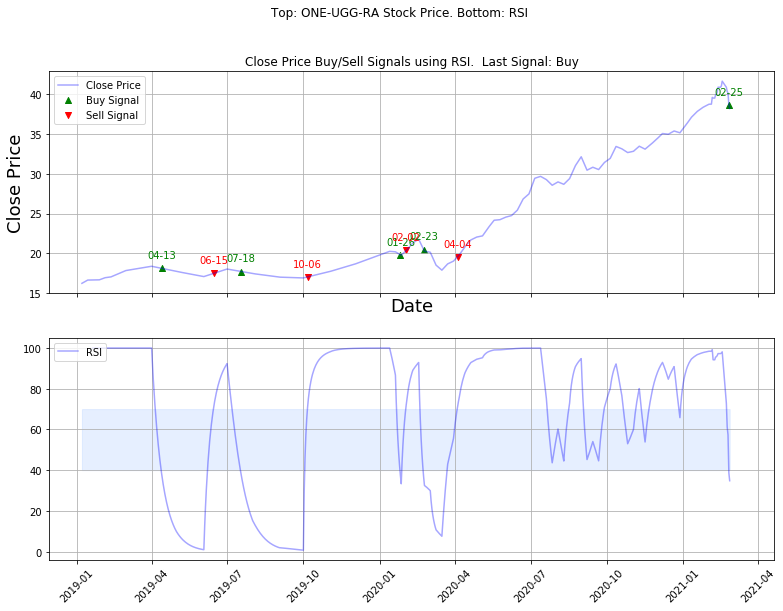

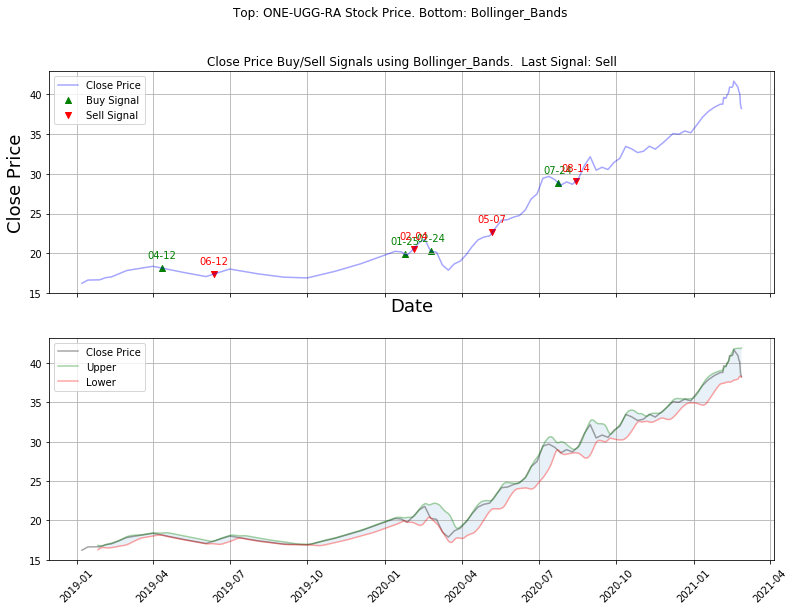

-------------  K-USA-A(A)  //////////////////////


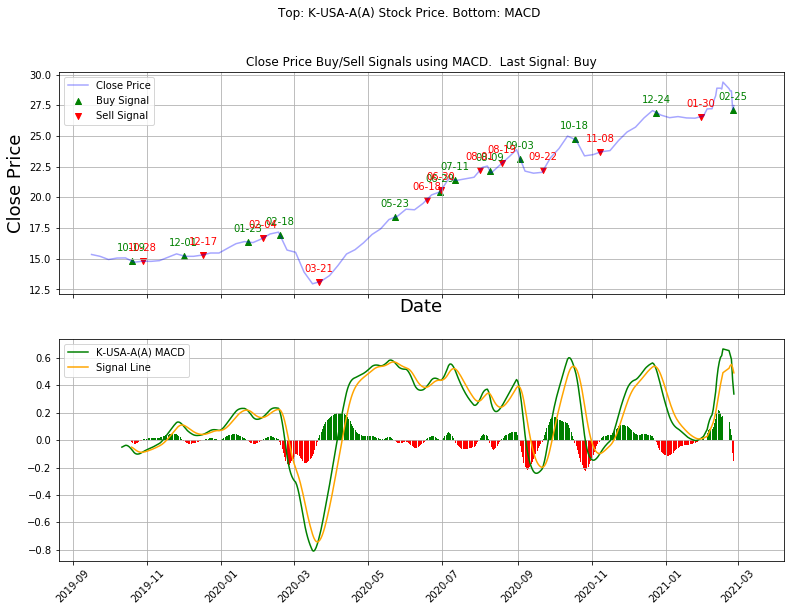

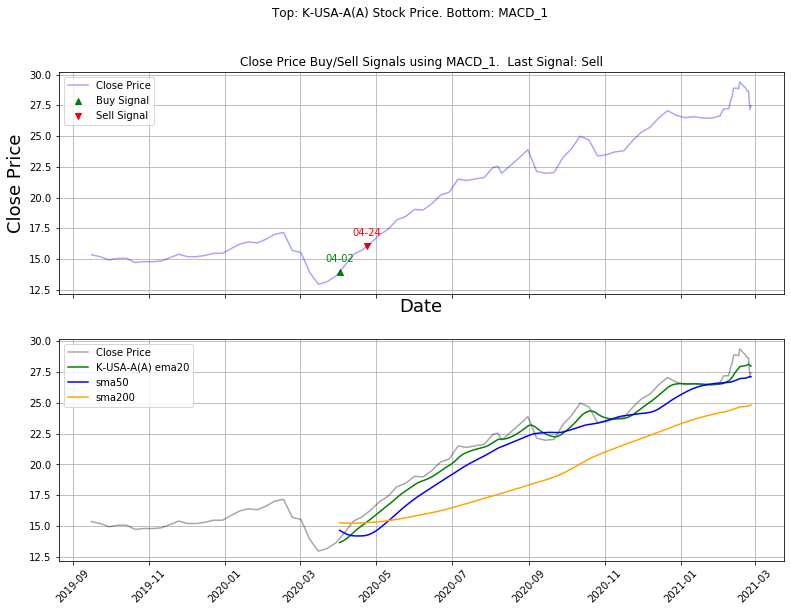

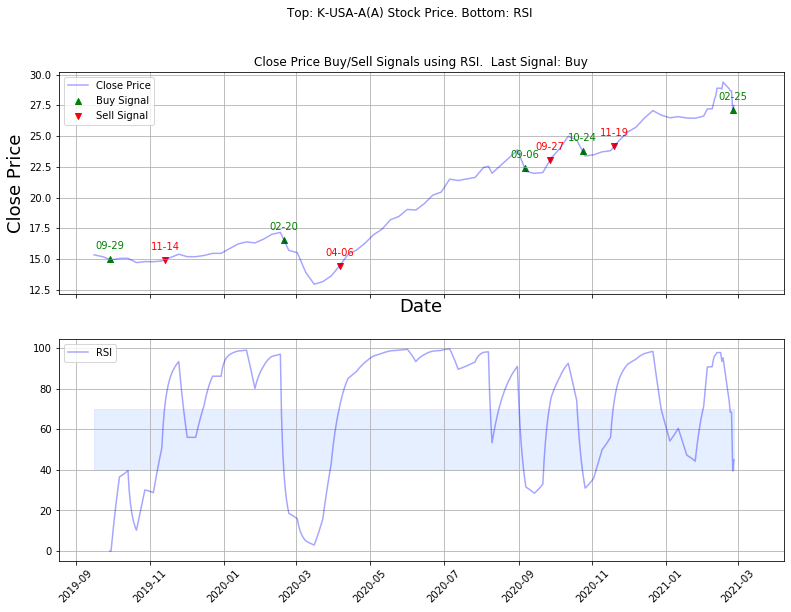

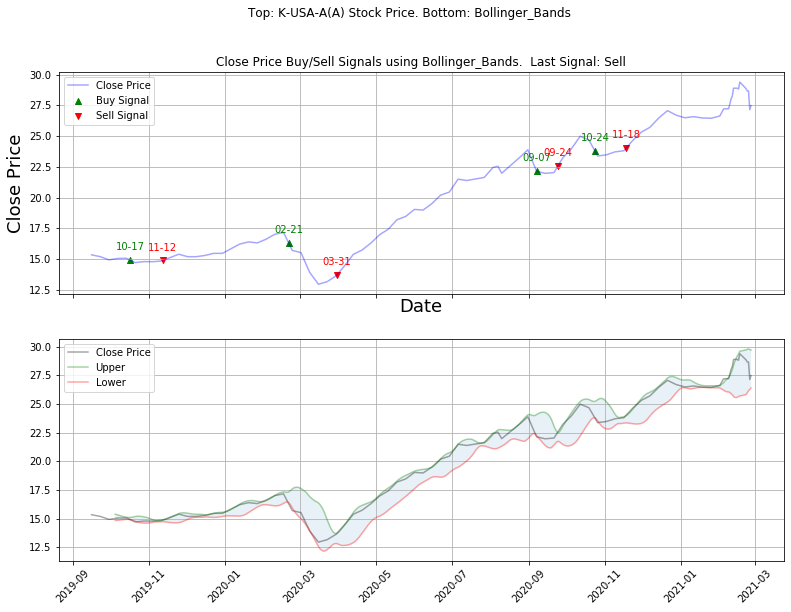

-------------  KFGBRAND-A  //////////////////////


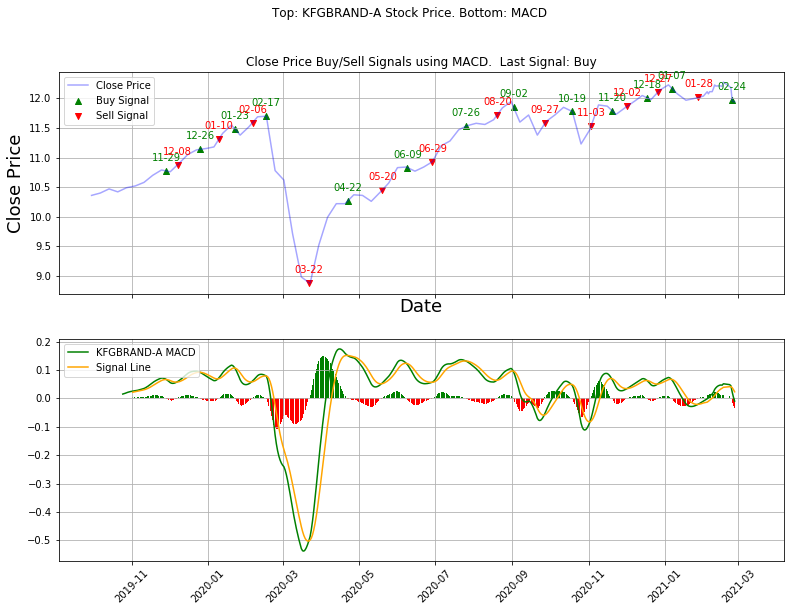

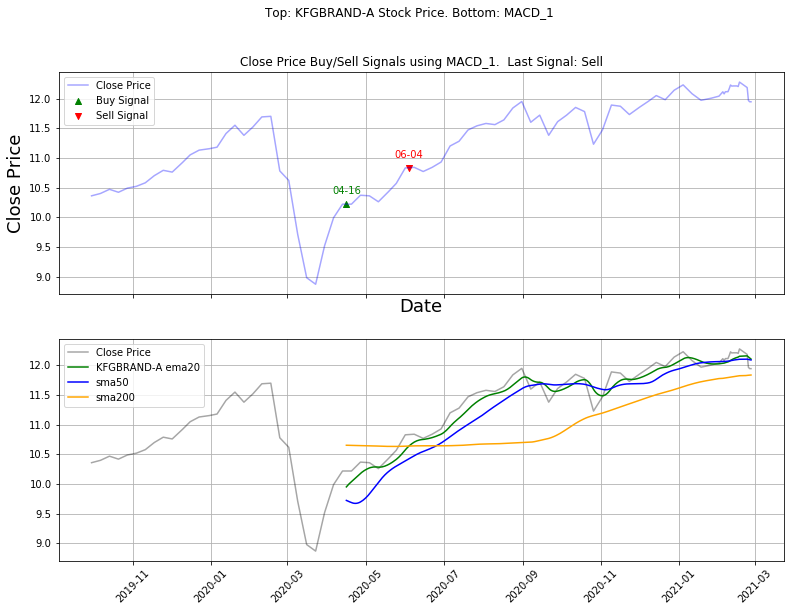

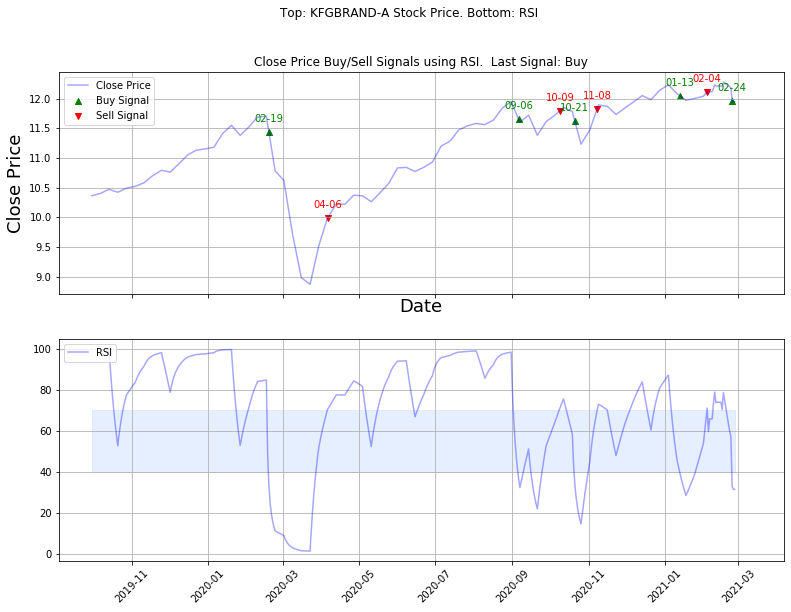

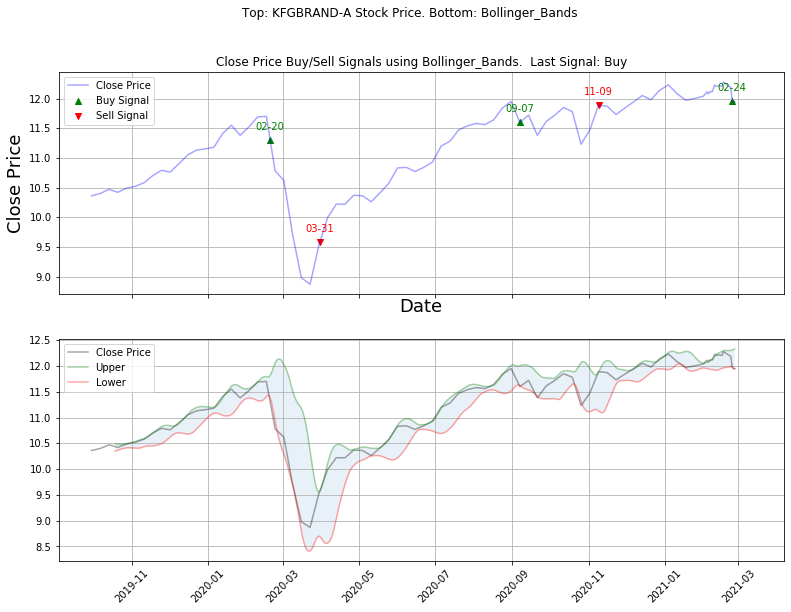

-------------  WE-CHIG  //////////////////////


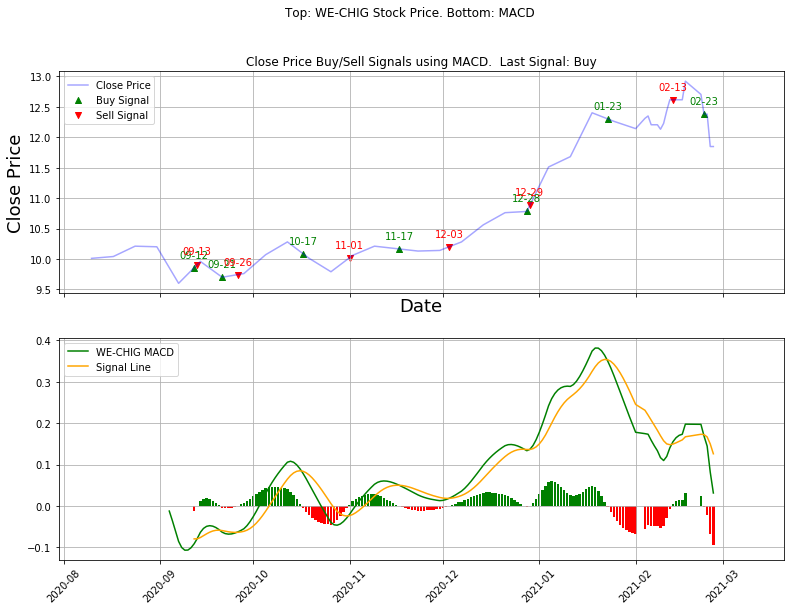

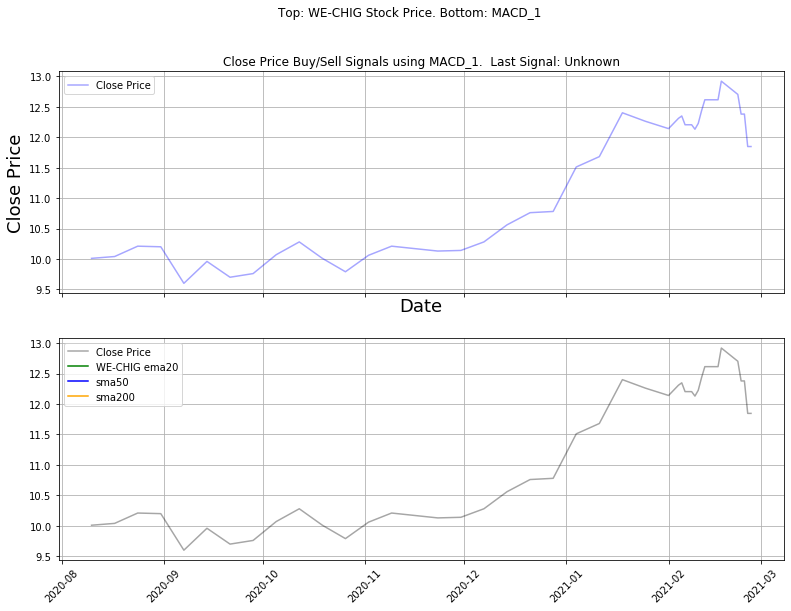

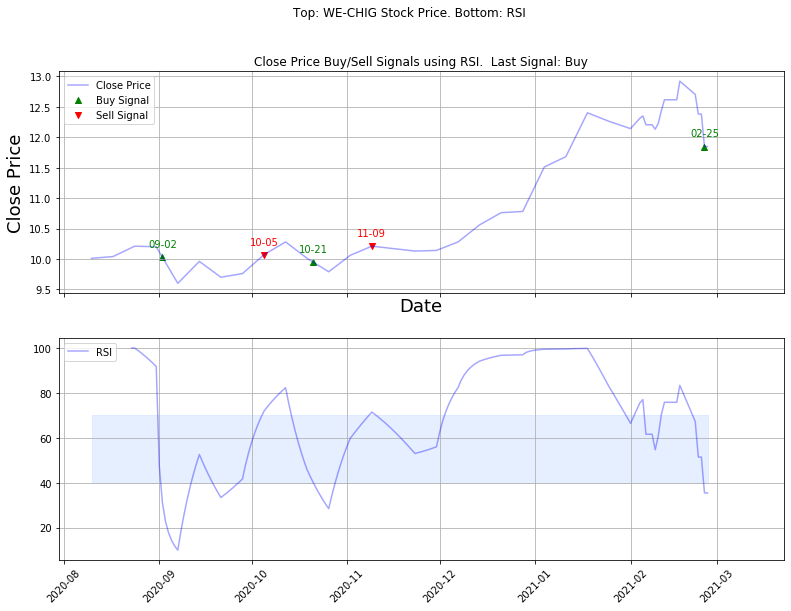

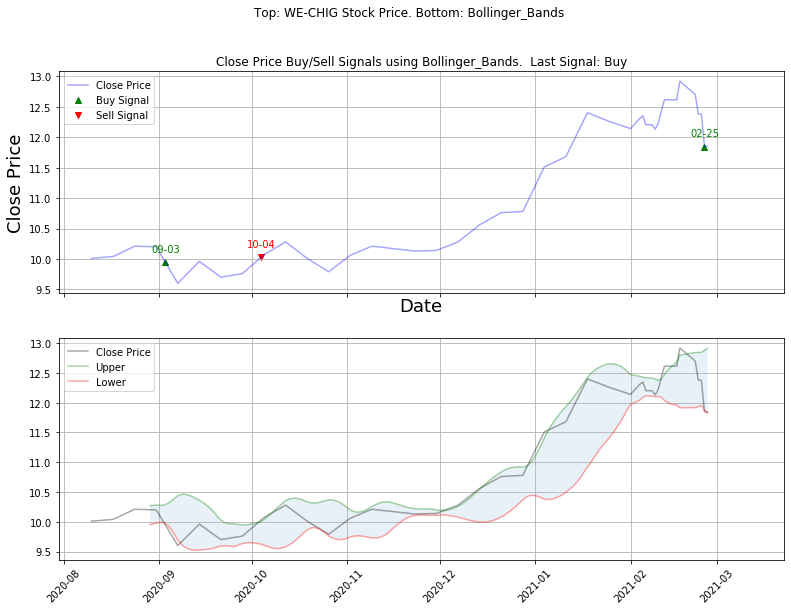

-------------  WE-CYBER  //////////////////////


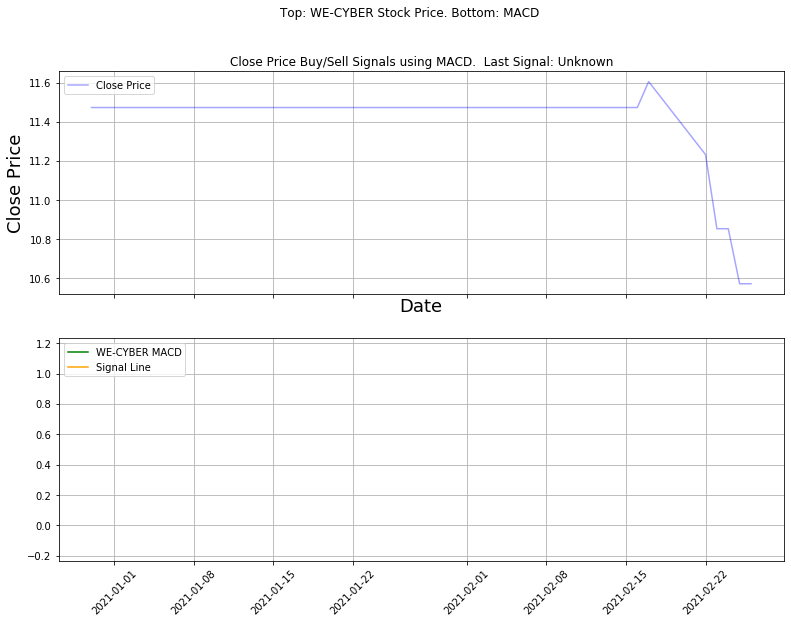

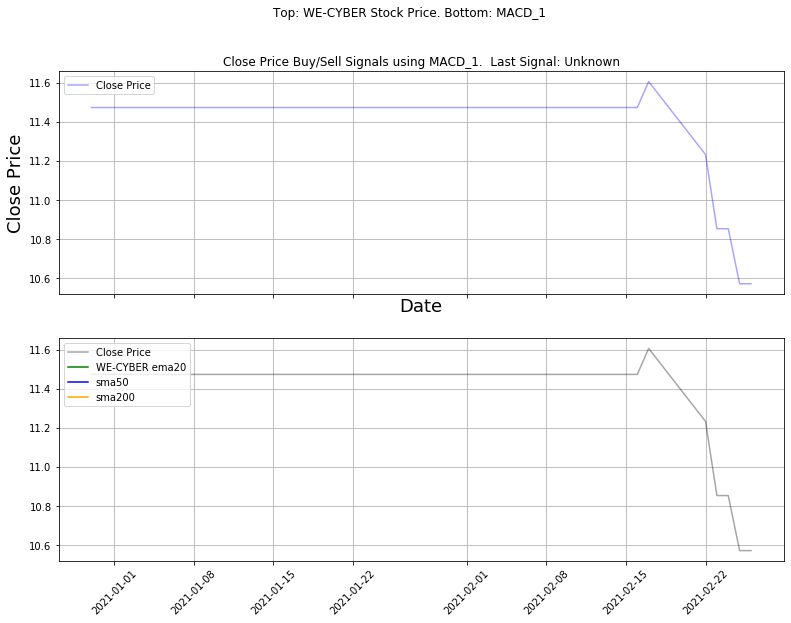

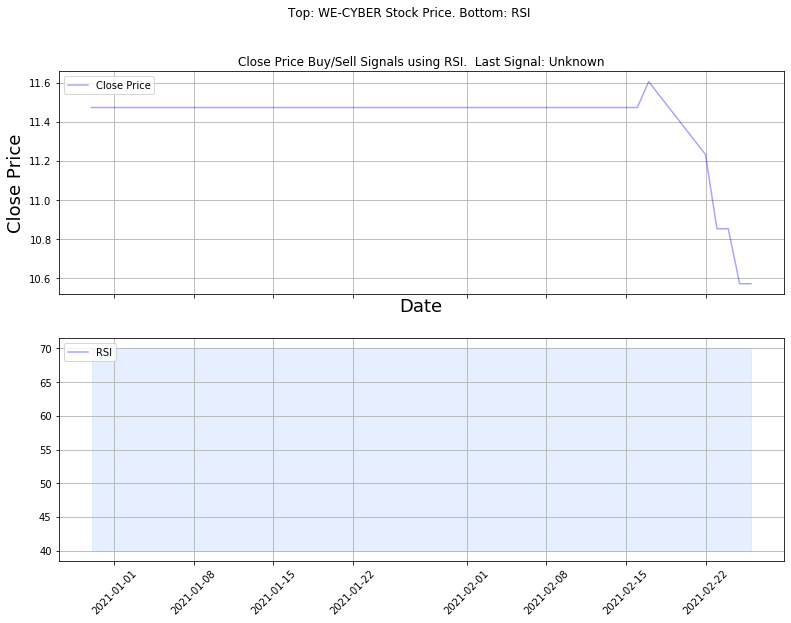

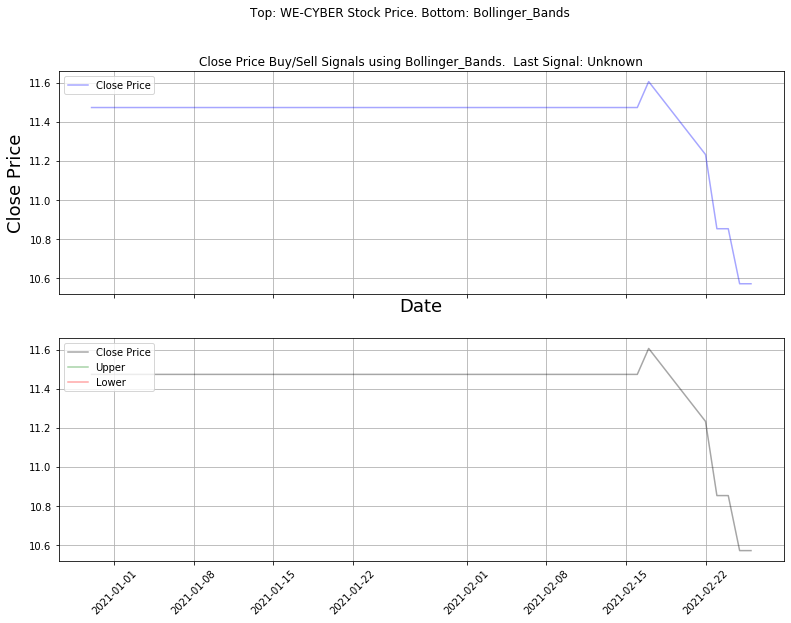

In [3]:
for fundName in fundList:
    #fundName='TMBCOF'
    print('------------- ', fundName, ' //////////////////////')
    dfIn=fundDict[fundName]

    #dfIn=pd.read_csv("C:/Users/70018928/Downloads/Fund_History_kfviet_20210208_v2.0.0.csv", parse_dates=["Date"])
    dfIn=dfIn.set_index(['Date'])

    # Load data to model
    company=Company(fundName,dfIn, 'Price')
    config={}

    # #Compute all indicators
    set_technical_indicators(config, company)

    plot_macd(company)
    plot_macd_2(company)
    plot_rsi(company)
    # Bollinger band : Buy when the close price crosses the lower band and Sell when the close price crosses the upper band line
    plot_bollinger_bands(company)
    plt.show()
    
del dfIn

-------------  TMBCOF  //////////////////////
 Max Drawdown (%) :  Price   -15.189873
dtype: float64  at  Price   2020-03-16
dtype: datetime64[ns]


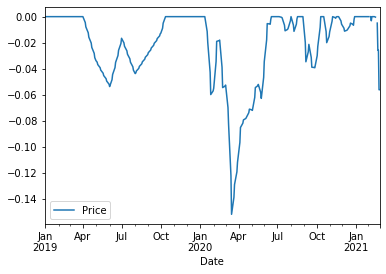

-------------  ONE-UGG-RA  //////////////////////
 Max Drawdown (%) :  Price   -17.960496
dtype: float64  at  Price   2020-03-16
dtype: datetime64[ns]


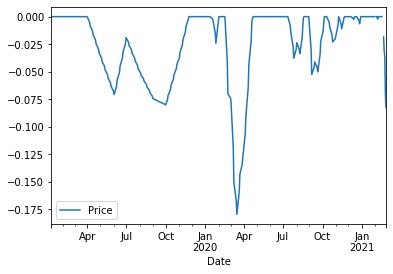

-------------  K-USA-A(A)  //////////////////////
 Max Drawdown (%) :  Price   -24.519511
dtype: float64  at  Price   2020-03-16
dtype: datetime64[ns]


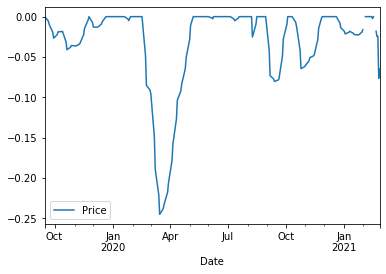

-------------  KFGBRAND-A  //////////////////////
 Max Drawdown (%) :  Price   -24.188034
dtype: float64  at  Price   2020-03-23
dtype: datetime64[ns]


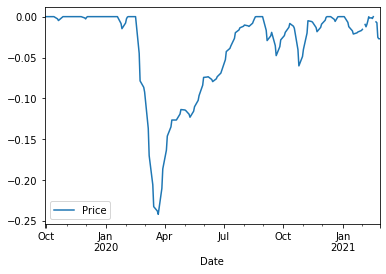

-------------  WE-CHIG  //////////////////////
 Max Drawdown (%) :  Price   -8.307016
dtype: float64  at  Price   2021-02-25
dtype: datetime64[ns]


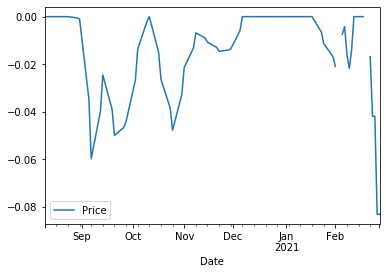

-------------  WE-CYBER  //////////////////////
 Max Drawdown (%) :  Price   -8.908554
dtype: float64  at  Price   2021-02-25
dtype: datetime64[ns]


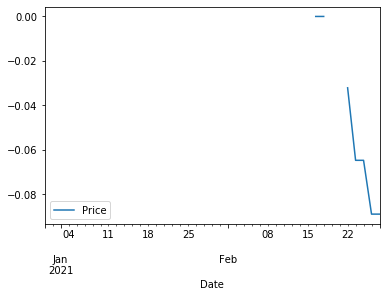

In [4]:
# Max Drawdown Calculation

for fundName in fundList:
    #fundName='TMBCOF'
    print('------------- ', fundName, ' //////////////////////')
    dfIn=fundDict[fundName]

    dfIn=dfIn.set_index(['Date'])

    dfIn=dfIn.asfreq('B')  # 'B' picks only Business day from Dataframe

    dfCalc=dfIn[['Price']]
    previous_peak=dfCalc.cummax()
    drawdown=(dfCalc-previous_peak)/previous_peak
    
    print(' Max Drawdown (%) : ',drawdown.min()*100,' at ',drawdown.idxmin())

    drawdown.plot()
    plt.show()

-------------  TMBCOF  //////////////////////
 Max Drawdown (%) :  Price   -5.615567
dtype: float64  at  Price   2021-02-25
dtype: datetime64[ns]


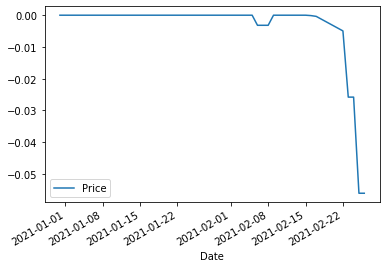

-------------  ONE-UGG-RA  //////////////////////
 Max Drawdown (%) :  Price   -8.27035
dtype: float64  at  Price   2021-02-26
dtype: datetime64[ns]


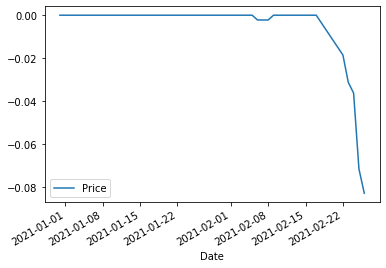

-------------  K-USA-A(A)  //////////////////////
 Max Drawdown (%) :  Price   -7.65132
dtype: float64  at  Price   2021-02-25
dtype: datetime64[ns]


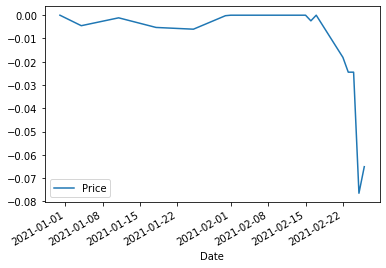

-------------  KFGBRAND-A  //////////////////////
 Max Drawdown (%) :  Price   -2.705807
dtype: float64  at  Price   2021-02-25
dtype: datetime64[ns]


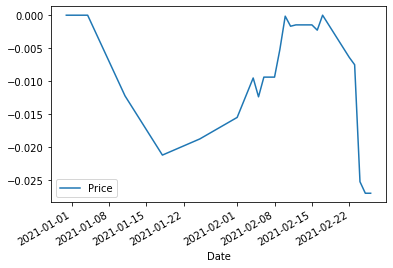

-------------  WE-CHIG  //////////////////////
 Max Drawdown (%) :  Price   -8.307016
dtype: float64  at  Price   2021-02-25
dtype: datetime64[ns]


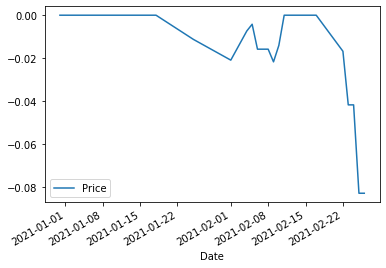

-------------  WE-CYBER  //////////////////////
 Max Drawdown (%) :  Price   -8.908554
dtype: float64  at  Price   2021-02-25
dtype: datetime64[ns]


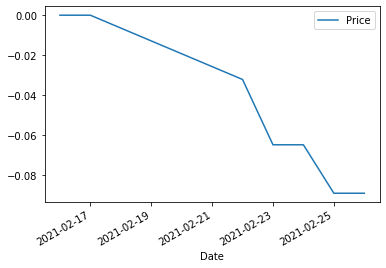

In [5]:
# Max Drawdown Calculation
from dateutil.relativedelta import relativedelta

##### This variable is used for YTD performance.
last_year = datetime.datetime.now() - relativedelta(years=1)
# Create string of month name and year...
text = format(last_year, '%Y')
end_of_last_year = datetime.datetime(int(text), 12, 31)


for fundName in fundList:
    #fundName='TMBCOF'
    print('------------- ', fundName, ' //////////////////////')
    dfIn=fundDict[fundName]

    dfIn=dfIn.set_index(['Date'])
    
    dfIn=dfIn[dfIn.index>=end_of_last_year]    
    #display(dfIn)
    #dfIn=dfIn.asfreq('B')  # 'B' picks only Business day from Dataframe

    dfCalc=dfIn[['Price']]
    previous_peak=dfCalc.cummax()
    drawdown=(dfCalc-previous_peak)/previous_peak
    
    print(' Max Drawdown (%) : ',drawdown.min()*100,' at ',drawdown.idxmin())

    drawdown.plot()
    plt.show()